#### Quantum Data Science 23/24

# Lecture 3 - Perceptrons


### Table of Contents

1. [Perceptron](#perceptron)
2. [Hands-on exercise](#hands_on_exercise_1)
3. [Sklearn perceptron](#sklearn_perceptron)

### 1 Perceptron <a id='perceptron'></a>

<img title="a title" alt="Alt text" src="images/neuron_vs_perceptron.png">

- The perceptron algorithm, developed by Frank Rosenblatt in 1957, represents one of the earliest supervised learning algorithms and forms the foundation for neural networks and deep learning. Inspired by biological neurons, the perceptron was designed to mimic the way a neuron processes input signals and generates an output signal.

- A biological neuron receives inputs through its dendrites, processes these inputs in its cell body, and then generates an output signal that travels along its axon. Similarly, the perceptron receives multiple input signals, processes them, and produces a single binary output. The primary purpose of the perceptron is classification, specifically, to classify input data into one of two categories, making it a linear binary classifier. It is best applied to problems where the data is linearly separable, meaning the two categories can be separated by a straight line (or hyperplane in higher dimensions).

The perceptron is the artificial realization of a biological neuron. It takes a set of inputs, multiplies them by a set of weights, and then passes the overall summation through an *heaviside step function*. 

$$
\begin{equation}
    \hat{y} = \begin{cases}
        1 & \text{if } \sum_{i=1}^{n} w_i x_i + b \geq 0 \\
        0 & \text{otherwise}    
    \end{cases}
\end{equation}
$$

#### **Learning rule**

Goal: Learn optimal weights $\theta$ and bias $b$ for a given task by minimizing the error of our prediction.

Suppose a binary classification task. Let $y$ be the true label and $\hat{y}$ the predicted label coming from our model. The perceptron define the error (*loss*) as the difference between the true label and the predicted label and updates weights and bias using a simple learning rule:

$$
\begin{align}
    \theta &= \theta - (y - \hat{y})x \\
    b &= b - (y - \hat{y})
\end{align}
$$

Thus it updates the weights and bias only when the prediction is wrong. This is known as the *perceptron learning rule*. There are many variants of this rule, especially around the learning rate and the well-known *stochastic gradient descent* algorithm. 

### 2 Hands-on exercise  <a id='hands-on_exercise_1'></a>


The [Scikit-learn](https://scikit-learn.org/stable/index.html) library provides a set of small standard datasets that are useful for quickly demonstrating the behavior of the various algorithms implemented in the library. They are documented in the Datasets section [Sklearn datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

You can even make you artificial datasets using the make_* functions [make random datasets sklearn](https://scikit-learn.org/stable/modules/classes.html#samples-generator)

Let us use the make_classification function to generate a linearly separable dataset for a binary classifier. 


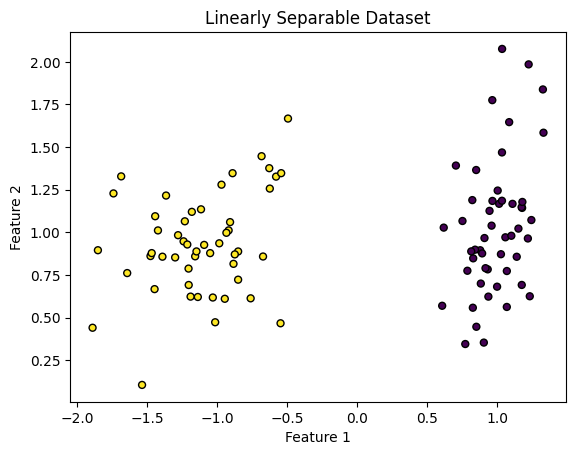

In [4]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

n_features = 2
n_samples = 100
n_classes = 2

# Generate a linearly separable dataset
X, y = make_classification(n_features=n_features, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_classes=n_classes, random_state=1)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.show()

Recall that data should be split into training and test sets. 

Sklearn provides a [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to do this.

In [5]:
from sklearn.model_selection import train_test_split

# 0.7 / 0.3 train-test random split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (70, 2)
X_test shape:  (30, 2)
y_train shape:  (70,)
y_test shape:  (30,)


#### **Create the perceptron algorithm**

Train the perceptron and test on unseen y_test data

In [6]:
class Perceptron:
    
    def __init__(self, eta=0.01, n_iter=10, weights=None, bias=None):
        self.eta = eta
        self.n_iter = n_iter
        self.weights = weights
        self.bias = bias
    
    def linear_model(self, X):
        """Calculate the inner product of the input and the weights and add the bias"""
        return np.inner(X,self.weights) + self.bias
        
        
    def heaviside(self, X):
        """Return class label after heaviside function"""
        sums = self.linear_model(X)
        if sums >= 0:
            return 1
        else:
            return 0
        
    
    def fit(self, X, y):
        """ Train the perceptron for n_iter using the learning rule explained above """
        for n in range(self.n_iter):
            
            
        
    def predict(self, X):
        """High level function to predict the class label for a given input to be used at test time"""



SyntaxError: expected ':' (1971805024.py, line 11)

In [ ]:
#create a perceptron object
eta = 0.1
n_iter = 10

ppn = Perceptron(eta=eta, n_iter=n_iter)

#train the perceptron
ppn.fit(X_train, y_train)

#predict the class labels
y_pred = ppn.predict(X_test)

#### **Test the accuracy of the model**


In [10]:
def accuracy(y_true, y_pred):
    """Calculate the accuracy of the model"""

### 3 Sklearn perceptron <a id='sklearn_perceptron'></a>

In [11]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
# Step 3: Train the Perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=1)
perceptron.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#### **Plot the decision boundary**

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
classifier = perceptron.fit(X_train, y_train)
disp = DecisionBoundaryDisplay.from_estimator(
   classifier, X_train, response_method="predict",
   xlabel="Feature 1", ylabel="Feature 2",
   alpha=0.5)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k")